## Bayesian Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

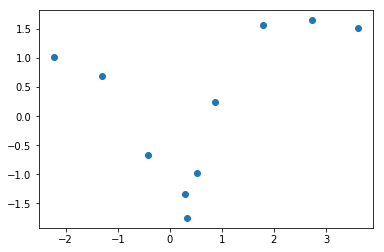

In [2]:
# Data Visualization
beta = 4
lamda = 1
X = [-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62]
Y = [1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51]
plt.plot(X,Y,'o')
plt.show()

In [3]:
def Gaussian(X, Mu, Sigma):
    '''
    X : NxD matrix
    Mu : Dx1 matrix
    Sigma : DxD matrix
    '''
    N, D = X.shape
    
    sub = (X-Mu.T)
    expo = -0.5*np.diag(np.dot(np.dot(sub, np.linalg.inv(Sigma)), sub.T))
    Nconst = 1/np.sqrt(np.linalg.det(2*np.pi*Sigma))
    return Nconst*np.exp(expo)

In [4]:
X_r = np.arange(-4,4,0.1)
phis = []
phis_r = []
k_range = np.arange(1,5)
for k in k_range:
    phi_k = []
    phi_k_r = []
    for i in range(0,k+1):
        phi_k.append(np.array(X)**(i))
        phi_k_r.append(np.array(X_r)**(i))
    phis.append(np.array(phi_k).T)
    phis_r.append(np.array(phi_k_r).T)

In [5]:
for phi in phis:
    print(phi.shape)

(10, 2)
(10, 3)
(10, 4)
(10, 5)


### Posterior calculation

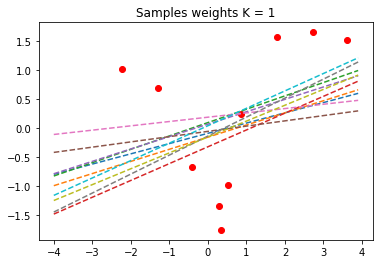

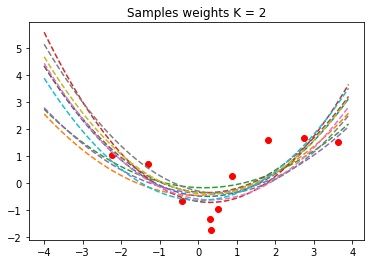

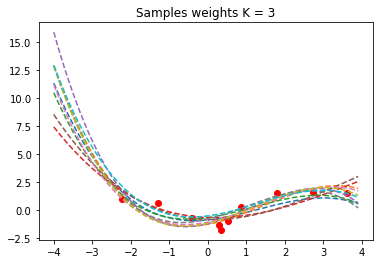

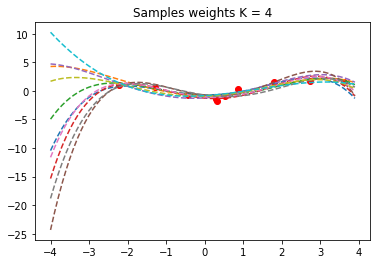

In [6]:
pos_mus = []
pos_sigs = []
inames = ['04.png','05.png','06.png','07.png']
for t in k_range:
    k=t-1
    sigma_kn = np.linalg.inv(beta*np.dot(phis[k].T, phis[k]) + lamda*np.eye(phis[k].shape[1]))
    mu_var = np.linalg.inv(np.dot(phis[k].T, phis[k]) + (lamda/beta)*np.eye(phis[k].shape[1]))
    mu_kn = np.dot(mu_var, np.dot(phis[k].T, np.array(Y).reshape(-1,1)))
    pos_mus.append(mu_kn)
    pos_sigs.append(sigma_kn)
    samples = np.random.multivariate_normal(mu_kn.reshape(-1), sigma_kn, size = 10)
    plt.plot(X,Y,'ro')
    for i in range(10):
        Y_s = np.dot(samples[i].reshape(-1,1).T, phis_r[k].T).T[:,0]
        plt.plot(X_r, Y_s, '--')
    plt.title("Samples weights K = " + str(t))
    plt.savefig(inames[k])
    plt.show()

### Posterior Predcitive calculation

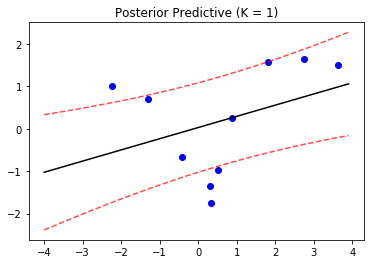

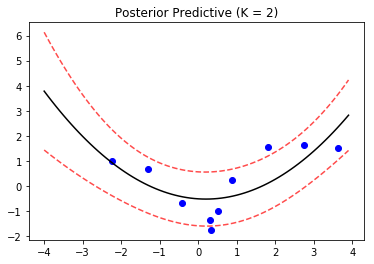

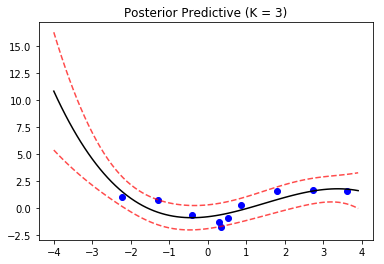

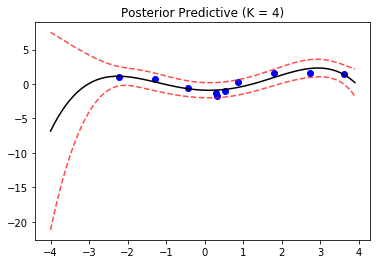

In [10]:
posp_mus = []
posp_sigs = []
inames = ['08.png','09.png','10.png','11.png']
for t in k_range:
    k=t-1
    mu_kn = pos_mus[k]
    sig_kn = pos_sigs[k]
    
    ppos_y_mus = np.dot(phis_r[k], mu_kn)
    ppos_y_sigs = np.diag(np.dot(np.dot(phis_r[k], sig_kn), phis_r[k].T)).reshape(-1,1) + 1/beta
    
    posp_mus.append(ppos_y_mus)
    posp_sigs.append(ppos_y_sigs)
    
    plt.plot(X,Y,'bo')
    plt.plot(X_r, ppos_y_mus , 'k')
    plt.plot(X_r, ppos_y_mus+2*np.sqrt(ppos_y_sigs), 'r--', alpha = 0.7)    
    plt.plot(X_r, ppos_y_mus-2*np.sqrt(ppos_y_sigs), 'r--', alpha = 0.7)
    plt.title("Posterior Predictive (K = " + str(t) +")")
    plt.savefig(inames[k])
    plt.show()

In [112]:
def get_LL_mar(phi_X, beta, lamda, y):
    N, D = phi_X.shape
    
    var = np.eye(N)/beta + np.dot(phi_X, phi_X.T)/lamda
    
    term1 = -(N/2)*np.log(2*np.pi)
    term2 = -(1/2)*np.log(np.linalg.det(var))
    term3 = -(1/2)*np.dot(y.T, np.dot(np.linalg.inv(var),y))
    
    return term1+term2+term3

In [113]:
for t in k_range:
    k = t-1
    phi_X = phis[k]
    y = np.array(Y).reshape(-1,1)
    LLk = get_LL_mar(phi_X, beta, 1, y)
    print("Log likelihood for k = ", t, "is ", LLk[0][0])

Log likelihood for k =  1 is  -32.35201528044522
Log likelihood for k =  2 is  -22.77215317878231
Log likelihood for k =  3 is  -22.07907064224099
Log likelihood for k =  4 is  -22.386776180354264


In [114]:
def get_LL_map(X, beta, w, y):
    N, D = phi_X.shape
    
    var = np.eye(N)/beta
    var2 = y-np.dot(X,w)
    
    term1 = -(N/2)*np.log(2*np.pi)
    term2 = -(1/2)*np.log(np.linalg.det(var))
    term3 = -(beta/2)*np.dot(var2.T,var2)
    
    return term1+term2+term3

In [120]:
for t in k_range:
    k = t-1
    phi_X = phis[k]
    y = np.array(Y).reshape(-1,1)
    LLk = get_LL_map(phi_X, beta,pos_mus[k] , y)
    print("MAP Log likelihood for k = ", t, "is ", LLk[0][0])

MAP Log likelihood for k =  1 is  -28.094004379075546
MAP Log likelihood for k =  2 is  -15.360663659052218
MAP Log likelihood for k =  3 is  -10.935846883615739
MAP Log likelihood for k =  4 is  -7.2252912590285625


### Thank you

18111002

Abhishek Kumar